In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [43]:
data = pd.read_csv("BlackFriday.csv")

In [44]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Drop the columns of User_ID and Product ID.

In [45]:
data = data.drop(['User_ID','Product_ID'], axis = 1)

In [46]:
data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


 The count values of "Product_Category_2" and "Product_Category_3" are lower than the other features. 

It means that there are lots of missing values in these twe columns.

In [47]:
data.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64

 From my viewpoint, the missing value in those two columns indicates that the consumer did not perchurse anything belonged to catogory 2 and/or catogory 3.

 Hence, I fill the null with 0 to do further analyze.

In [48]:
data = data.fillna(0)

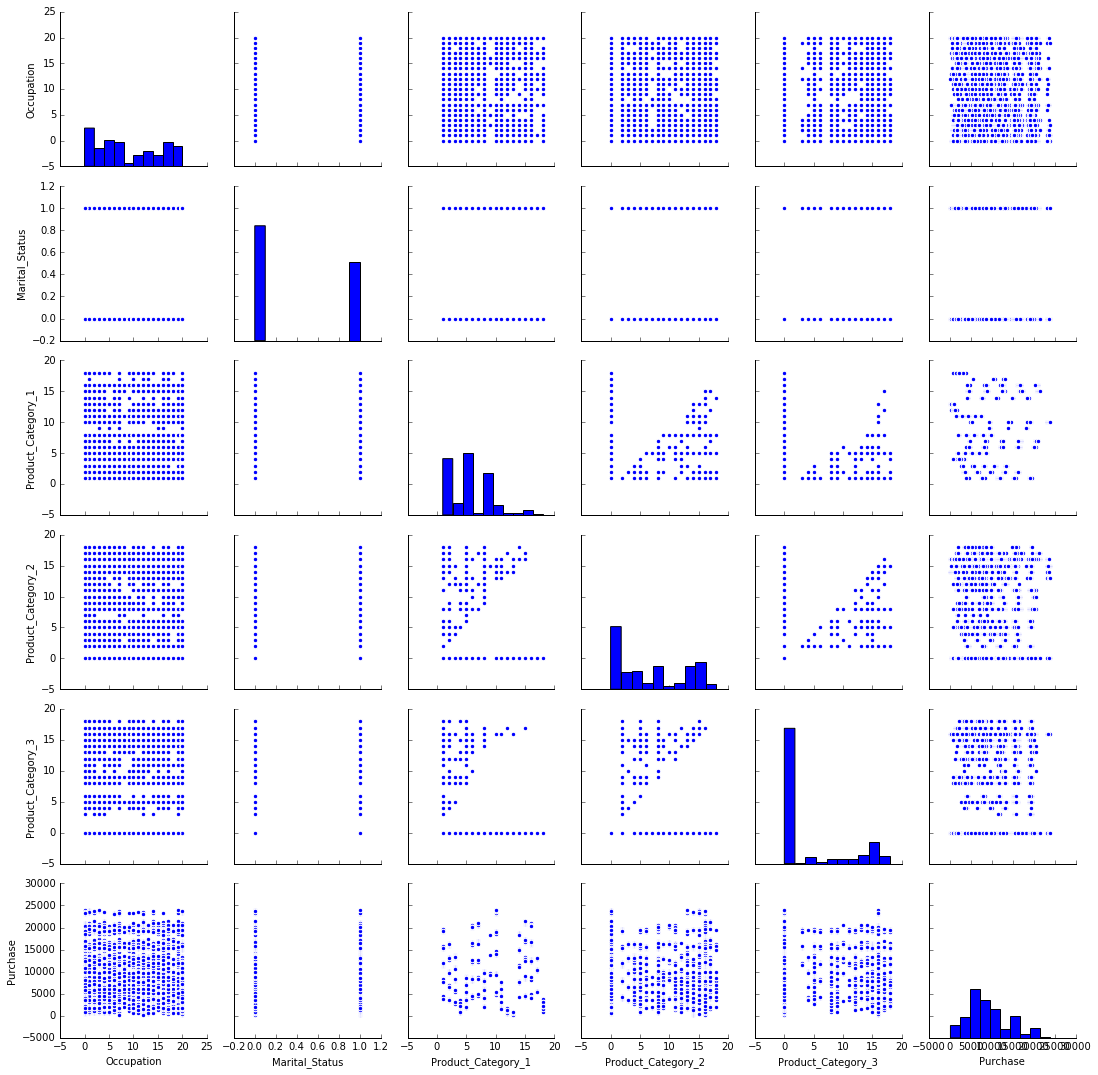

In [49]:
import seaborn as sns
%matplotlib inline
plt.figure()
sns.pairplot(data)

 From the above plot, the correlation between "Purchase" and the other features seems very low since the points on plot are dramatically discrete. 

It is reasonable to speculate that the R square will be very small since the low correlation between the independent variables and the dependent variables.

### Categorical data

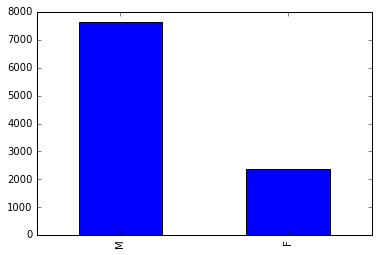

In [50]:
data.loc[:,'Gender'].value_counts().plot(kind='bar')

 The male consumer is the majority in this dataset.

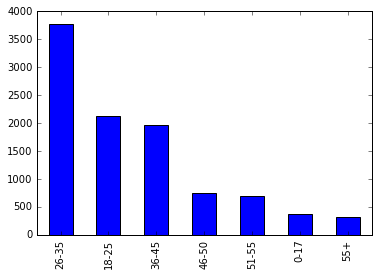

In [51]:
data.loc[:,'Age'].value_counts().plot(kind='bar')

 Most of the consumers are age from 26 to 45. The older and the children are minors. 

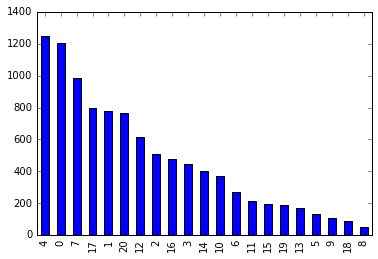

In [52]:
data.loc[:,'Occupation'].value_counts().plot(kind='bar')

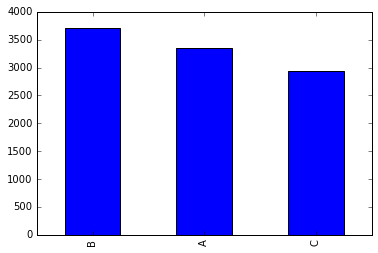

In [53]:
data.loc[:,'City_Category'].value_counts().plot(kind='bar')

### Preprocess the data, e.g. categorical data, etc.

#### Turn the catogory data such as 'Gender Age','Occupation','age','City_Category' and 'Stay_In_Current_City_Years' into digital data.

#### Then convert those digital variables into dummy variables.

In [54]:
gender = data.loc[:,"Gender"]

In [55]:
gender.value_counts()

M    7636
F    2364
Name: Gender, dtype: int64

In [56]:
gender_mapping = {'M':1, 'F':0}

In [57]:
data.loc[:,'Gender'] = data.loc[:,'Gender'].map(gender_mapping)

In [60]:
city = data.loc[:,"City_Category"]

In [61]:
city.value_counts()

B    3711
A    3346
C    2943
Name: City_Category, dtype: int64

In [62]:
city_mapping = {'A':0, 'B':1, 'C':2}

In [63]:
data.loc[:,'City_Category'] = data.loc[:,'City_Category'].map(city_mapping)

In [64]:
city_B = pd.get_dummies(data.loc[:,'City_Category'])[1]
city_C = pd.get_dummies(data.loc[:,'City_Category'])[2]

In [65]:
stay_year = data.loc[:,"Stay_In_Current_City_Years"]

In [66]:
stay_year.value_counts()

1     3190
3     1891
2     1770
4+    1684
0     1465
Name: Stay_In_Current_City_Years, dtype: int64

In [67]:
stay_year_mapping = {'1':1, '2':2, '3':3, '4+':4, '0':0}

In [68]:
data.loc[:,'Stay_In_Current_City_Years'] = data.loc[:,'Stay_In_Current_City_Years'].map(stay_year_mapping)

In [69]:
stay1 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[1]
stay2 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[2]
stay3 = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[3]
stay4plus = pd.get_dummies(data.loc[:,'Stay_In_Current_City_Years'])[4]

In [70]:
age = data.loc[:,"Age"]

In [71]:
age.value_counts()

26-35    3776
18-25    2118
36-45    1961
46-50     752
51-55     690
0-17      378
55+       325
Name: Age, dtype: int64

In [72]:
age_mapping = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}

In [73]:
data.loc[:,'Age'] = data.loc[:,'Age'].map(age_mapping)

In [74]:
age18 = pd.get_dummies(data.loc[:,'Age'])[1]
age26 = pd.get_dummies(data.loc[:,'Age'])[2]
age36 = pd.get_dummies(data.loc[:,'Age'])[3]
age46 = pd.get_dummies(data.loc[:,'Age'])[4]
age51 = pd.get_dummies(data.loc[:,'Age'])[5]
age55plus = pd.get_dummies(data.loc[:,'Age'])[6]

Check whether the data contains missing values.

In [75]:
data.loc[:,'Gender'].isnull().sum()

0

In [76]:
data.loc[:,'Age'].isnull().sum()

0

In [77]:
data.loc[:,'Occupation'].isnull().sum()

0

In [78]:
data.loc[:,'City_Category'].isnull().sum()

0

In [79]:
data.loc[:,'Stay_In_Current_City_Years'].isnull().sum()

0

In [80]:
data.loc[:,'Marital_Status'].isnull().sum()

0

In [81]:
data.loc[:,'Product_Category_1'].isnull().sum()

0

In [82]:
data.loc[:,'Product_Category_2'].isnull().sum()

0

'Age', 'City_Category', 'Stay_In_Current_City_Years' and 'Occupation' should be replaced by the dummy variables.

In [84]:
cutdata = data.drop(["Age", "City_Category", "Stay_In_Current_City_Years"], axis = 1)

To avoid the collinearity, I take "city A", "stay0" and "age0-17" as reference group.

In [85]:
cutdata.insert(0,"city_B", city_B)
cutdata.insert(0,"city_C", city_C)
cutdata.insert(0,"stay1", stay1)
cutdata.insert(0,"stay2", stay2)
cutdata.insert(0,"stay3", stay3)
cutdata.insert(0,"stay4+", stay4plus)
cutdata.insert(0,"age18", age18)
cutdata.insert(0,"age26", age26)
cutdata.insert(0,"age36", age36)
cutdata.insert(0,"age46", age46)
cutdata.insert(0,"age51", age51)
cutdata.insert(0,"age55+", age55plus)

In [86]:
cutdata.head(5)

,age55+,age51,age46,age36,age26,age18,stay4+,stay3,stay2,stay1,city_C,city_B,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,10,0,3,0.0,0.0,8370
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,10,0,1,6.0,14.0,15200
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,10,0,12,0.0,0.0,1422
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,10,0,12,14.0,0.0,1057
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,16,0,8,0.0,0.0,7969


In [87]:
Y = cutdata['Purchase']

In [88]:
cutdata = cutdata.drop(['Purchase'], axis = 1)

### Do the multiple linear regression with all variables. 

In [89]:
from sklearn import linear_model
import statsmodels.api as sm

In [90]:
regr = linear_model.LinearRegression()
regr = regr.fit(cutdata, Y)

In [91]:
print(regr.intercept_,regr.coef_)

9226.10485877 [ -83.90088142  427.99481872   51.8353424    60.19310179   56.33704115
 -243.85819955  286.82038626   51.9216188   436.21755556  286.02426237
  799.30144014  271.66131867  608.12504892   -8.56557871  -52.60279027
 -318.61786522   14.98402341  147.94213362]


In [92]:
cutdata = sm.add_constant(cutdata)
model = sm.OLS(Y,cutdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     93.10
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          7.47e-319
Time:                        09:02:26   Log-Likelihood:                -98345.
No. Observations:               10000   AIC:                         1.967e+05
Df Residuals:                    9981   BIC:                         1.969e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               9226.1049    295.113     31.263      0.000      8647.623  9804.586
age55+               -83.9009    348.106     -0.241      0.810      -766.259   598.457
age51                427.9948    301.732      1.418      0.156      -163.461  1019.450
age46                 51.8353    294.219      0.176      0.860      -524.894   628.564
age36                 60.1931    259.719      0.232      0.817      -448.909   569.295
age26                 56.3370    248.982      0.226      0.821      -431.718   544.392
age18               -243.8582    255.747     -0.954      0.340      -745.174   257.457
stay4+               286.8204    163.962      1.749      0.080       -34.578   608.219
stay3                 51.9216    158.308      0.328      0.743      -258.395   362.238
stay2                436.2176    160.530      2.717      0.007       121.547   750.888
stay1                286.0243    144.610      1.978      0.048         2.559   569.489
city_C               799.3014    117.295      6.814      0.000       569.379  1029.224
city_B               271.6613    109.516      2.481      0.013        56.989   486.334
Gender               608.1250    108.732      5.593      0.000       394.988   821.262
Occupation            -8.5656      7.025     -1.219      0.223       -22.336     5.205
Marital_Status       -52.6028     99.295     -0.530      0.596      -247.241   142.035
Product_Category_1  -318.6179     13.515    -23.575      0.000      -345.111  -292.125
Product_Category_2    14.9840      7.364      2.035      0.042         0.549    29.419
Product_Category_3   147.9421      7.901     18.724      0.000       132.454   163.430
==============================================================================
Omnibus:                     1004.057   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.299
Skew:                           0.807   Prob(JB):                    3.43e-302
Kurtosis:                       3.852   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the above table, it comes to some inferences.

The p-value of constant term, Stay1, stay2, city, Product_Category_1, Product_Category_2 andProduct_Category_3 are minor than 0.05. It indicates that the above variables are influential to the purchase.

Compared to residents in city A and city B, dwellers in city C spent more money on Black Friday.

People who stay in a city for less than one year consumed less than one who lives in the same place for 2 or 3 years.

The effect of the product category 2 is much limited to one of the product 1 and product 3.

Strangely, the coefficient of the term "Product_Category_1" is negative. The more amount of merchandise of category 1 one buys, the minor the total purchase.

### Show the residuals plots against the fitted response variables. 

In [93]:
ypred = model.predict(cutdata)

In [94]:
Residual = Y-ypred

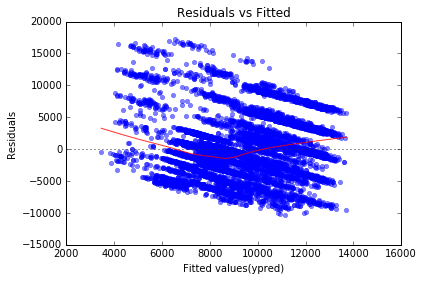

In [95]:
plot_1 = plt.figure()
plot_1.axes[0] = sns.residplot(ypred,Residual , data=cutdata, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_1.axes[0].set_title('Residuals vs Fitted')
plot_1.axes[0].set_xlabel('Fitted values(ypred)')
plot_1.axes[0].set_ylabel('Residuals');

The bow-shaped line in red indicates that we are failing to capture some of the non-linear features of the model. 

In other words, the variance in the data might be better captured using the square of one or more of the features.

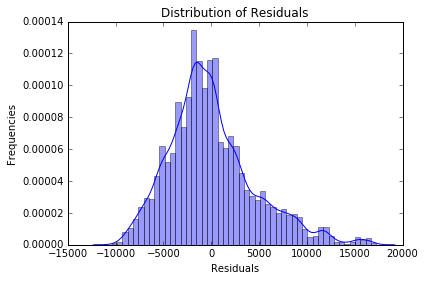

In [96]:
plot_2 = plt.figure()
plot_2.axes[0] = sns.distplot(Residual)
plot_2.axes[0].set_title('Distribution of Residuals')
plot_2.axes[0].set_xlabel('Residuals')
plot_2.axes[0].set_ylabel('Frequencies')

By the above plot, the residual follows the normal probability distribution.